In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


La densidad para el Bulge está dada por

$$\begin{equation}\rho_{b}(R,z)=\rho_{b,0} (\frac{\sqrt{R^{2} + z^{2}/q_{b}^{2}}}{a_{b}})^{-\alpha_b} e^{-(R^{2} + z^{2}/q_{b}^{2})/r_{b}^{2}}\end{equation}$$

con los siguientes valores para los parámetros

$\alpha_{b} = 1.8$, $q_{b} = 0.6$, $r_{b} = 1.9kpc$ y $a_{b} = 1kpc$

In [3]:
R = np.linspace(-15.,15.,100)
z = np.linspace(-15.,15.,100)

In [28]:
def densidad_b(R,z,q=0.6,alpha_b=1.8,a_b=1.0e03,r_b=1.9e03):
    m = np.sqrt(R**2. + z**2./q**2.) 
    t1 = (m/a_b)**(-alpha_b)
    d = np.exp(-m**2./r_b**2.)
    rho_b = t1*d
    return rho_b

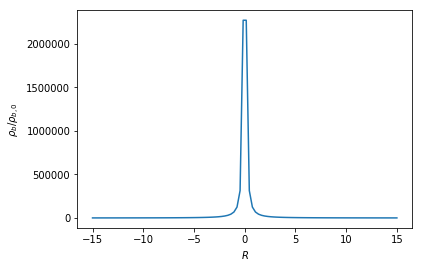

In [29]:
plt.plot(R, densidad_b(R,z))
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{b}/\rho_{b,0}$')
plt.show()

Para este caso tomaremos a la velocidad circular de la siguiente forma $$\begin{equation}
\frac{V_{c}^{2}}{G\rho_{b,0}r_{b}^{2}C} = y^{2-\alpha_{b}}  \int^{1}_{0} dx \frac{x^{2-\alpha_{b}}exp(x^{2}y^{2})}{\sqrt{1-x^{2}e^{2}}}
\end{equation}$$

donde $$\begin{equation}
C = 4\pi \sqrt{1-e^{2}} (\frac{r_{b}}{a_{b}})^{-\alpha_{b}}
\end{equation}$$
y $$\begin{equation}
e = \sqrt{1-q_{b}^2}
\end{equation}$$
y haciendo
$$\begin{equation}
U = G\rho_{b,0}r_{b^{2}}
\end{equation}$$
donde de la tabla 2.3 sabemos que $\rho_{b,0}$ toma los valores 0.427 y 0.3 para los modelos I y II respectivamente

In [30]:
G = 4.302e-3
r_b2 = 3.61e6
U = G*r_b2
q_b = 0.6
r_b = 1.9e03
a_b = 1.0e03
alpha_b = 1.8
C = 4.*np.pi*q_b*(r_b/a_b)**(-alpha_b)
print C

2.37467747459


In [8]:
from scipy import integrate

In [9]:
def I_b(x,y,q_b=0.6,alpha_b=1.8):
    e = np.sqrt(1.-q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-x**2. * y**2.)
    d = np.sqrt(1.-x**2. * e**2.)
    return y**(2.-alpha_b)*n/d

In [10]:
y = np.linspace(0.,15.,100)

In [11]:
def Vc_ad_b(l):
    Integral_b = []
    for i in range (0,len(l)):
        result = integrate.quad(I_b,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.sqrt(Integral_b)

In [18]:
r = np.linspace(0.,15.,100)
print len(r)

100


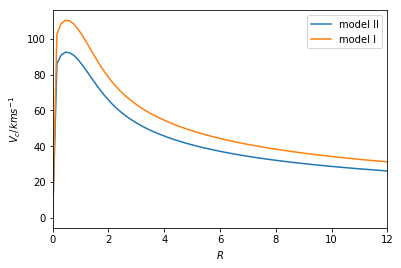

In [31]:
plt.plot(r,np.sqrt(C*U*0.3)*Vc_ad_b(y),label='model II')
plt.plot(r,np.sqrt(C*U*0.427)*Vc_ad_b(y),label='model I')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [20]:
R_1,z_1 = np.meshgrid(R,z)

In [23]:
print np.min(densidad_b(R_1,z_1)),np.max(densidad_b(R_1,z_1))

1.27590832652754e-105 8.815215267322444


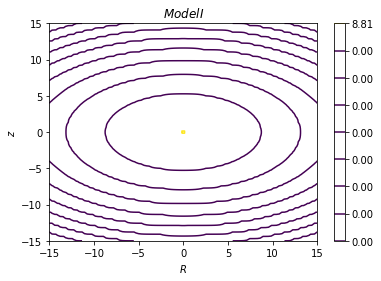

In [27]:
levels=10**np.linspace(np.log10(1.27e-105),np.log10(8.81),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_b(R_1,z_1),levels=levels)
plt.xlabel(r'$R$')
plt.ylabel(r'$z$')
plt.title(r'$Model I$')
#plt.xlim(-6.,6.)
#plt.ylim(-1.,1.)
plt.colorbar(lm)
plt.show()